In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

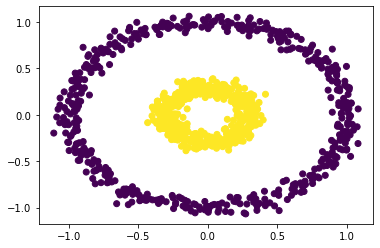

In [2]:
from sklearn.datasets import make_circles 
def Get_Circles_data(ShowGraph=1) :
    X, y = make_circles(n_samples=1000, random_state=2000, noise=0.05, factor=0.3) 
    if ShowGraph == 1 : plt.scatter(X[:,0], X[:, 1], c=y) 
        
    return X, y 
X, y = Get_Circles_data()

# 1. Get Data (Two blobs data)

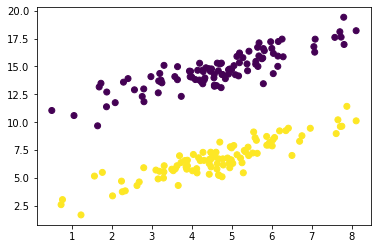

In [3]:
def Get_TwoBlobs_data(ShowGraph = 0):
    size = 100
    np.random.seed(2000)
    X1 = np.random.normal(4.5, 1.3, size)
    Y1 = np.random.normal(2.0, 0.8, size) + X1
    X2 = X1 + np.random.normal(0.01, 0.3, size)
    Y2 = Y1 + 8.0
    
    X = np.append(X1, X2)
    Y = np.append(Y1, Y2)
    XX = np.append(X, Y)
    
    XX = np.reshape(XX, newshape = (2, size*2)).transpose()
    
    y1 = [1 for i in range(size)]
    y2 = [0 for i in range(size)]
    y = np.append(y1, y2)
    
    %matplotlib inline
    if ShowGraph == 1:
        plt.scatter(XX[:, 0], XX[:, 1], c = y)
        
    return XX, y

X, y = Get_TwoBlobs_data(ShowGraph = 1)

## 2. Normalize the data standard scalar

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

## 3. Split Data into Training and Testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2018)

## 4. Build ML/DL model

In [6]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(class_weight='balanced')

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

# 5. Training

In [7]:
model = DT
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

# 6. Testing on training data

In [8]:
pred = model.predict(X_train)
ans = pred - y_train
print(ans)
print(ans.sum())
print(abs(ans).sum())

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
0
0


# 7. Testing on test data

In [9]:
pred = model.predict(X_test)
ans = pred - y_test
print(ans)
print(ans.sum())
error_cnt = abs(ans).sum()
print(error_cnt)
print(error_cnt / y_test.shape[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0]
0
2
0.04


# 8. Make a SubRoutine

In [10]:
def TrainTestResult(mymodel, X_train, X_test, y_train, y_test):
    mymodel.fit(X_train, y_train)
    
    pred = mymodel.predict(X_train)
    ans = pred - y_train
    error_cnt = abs(ans).sum()
    accuracy_train = 1 - error_cnt / y_train.shape[0]
    
    pred = mymodel.predict(X_test)
    ans = pred - y_test
    error_cnt = abs(ans).sum()
    accuracy_test = 1 - error_cnt / y_test.shape[0]
    
    return accuracy_train, accuracy_test

In [11]:
TrainTestResult(RF, X_train, X_test, y_train, y_test)

(1.0, 0.96)

In [12]:
TrainTestResult(DT, X_train, X_test, y_train, y_test)

(1.0, 0.96)

# 9. Make a subroutine that can specify model as a parameter

In [13]:
def myModelTrainTestResult(modelname, X_train, X_test, y_train, y_test):
    select_model = {'DT': DecisionTreeClassifier(),
                   'RF': RandomForestClassifier() }
    mymodel = select_model[modelname]
    
    mymodel.fit(X_train, y_train)
    
    pred = mymodel.predict(X_train)
    ans = pred - y_train
    error_cnt = abs(ans).sum()
    accuracy_train = 1 - error_cnt / y_train.shape[0]
    
    pred = mymodel.predict(X_test)
    ans = pred - y_test
    error_cnt = abs(ans).sum()
    accuracy_test = 1 - error_cnt / y_test.shape[0]
    
    return modelname, accuracy_train, accuracy_test

In [14]:
myModelTrainTestResult('DT', X_train, X_test, y_train, y_test)

('DT', 1.0, 0.96)

In [15]:
myModelTrainTestResult('RF', X_train, X_test, y_train, y_test)

('RF', 1.0, 0.96)

In [16]:
R = []
for i in ['DT', 'RF', 'DT', 'RF']:
    R = R + [myModelTrainTestResult(i, X_train, X_test, y_train, y_test)]
    
print(R)

[('DT', 1.0, 0.96), ('RF', 1.0, 0.96), ('DT', 1.0, 0.96), ('RF', 1.0, 0.96)]


# 10. Dive in DT and RF

## 10.1 Decision Tree

In [17]:
mymodel = DecisionTreeClassifier()
mymodel.fit(X_train, y_train)

pred = mymodel.predict(X_train)
ans = pred - y_train
error_cnt = abs(ans).sum()
accuracy_train = 1 - error_cnt / y_train.shape[0]

pred = mymodel.predict(X_test)
ans = pred - y_test
error_cnt = abs(ans).sum()
accuracy_test = 1 - error_cnt / y_test.shape[0]

print(accuracy_train, accuracy_test)

1.0 0.96


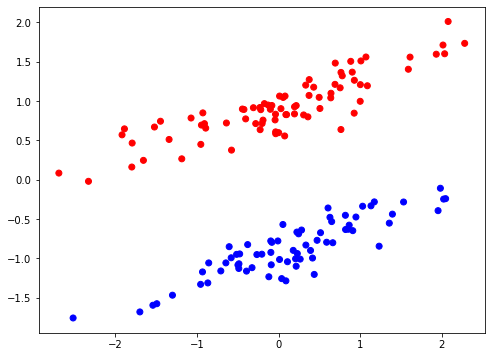

In [18]:
dictColor = { 0 : 'r', 1 : 'b'}
plt.figure(figsize = [8, 6])
mycolor = [ dictColor[x] for x in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c = mycolor)

[Text(0.5, 0.75, 'X[1] <= -0.065\ngini = 0.498\nsamples = 150\nvalue = [80, 70]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 70\nvalue = [0, 70]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 80\nvalue = [80, 0]')]

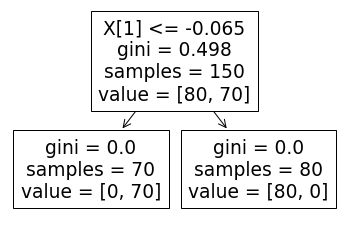

In [19]:
mymodel.fit(X_train, y_train)

from sklearn import tree
tree.plot_tree(mymodel)

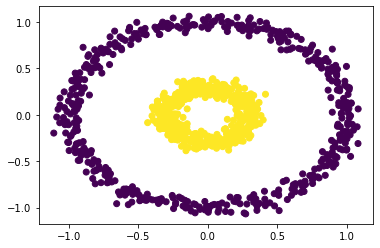

In [20]:
from sklearn.datasets import make_circles 
def Get_Circles_data(ShowGraph=1) :
    X, y = make_circles(n_samples=1000, random_state=2000, noise=0.05, factor=0.3) 
    if ShowGraph == 1 : plt.scatter(X[:,0], X[:, 1], c=y) 
        
    return X, y 
X, y = Get_Circles_data()

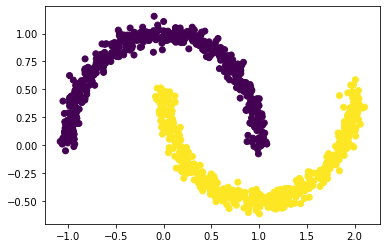

In [31]:
from sklearn.datasets import make_moons
def Get_Moons_data(ShowGraph=1) :
    X, y = make_moons(n_samples=1000, noise=0.05) 
    if ShowGraph == 1 : plt.scatter(X[:,0], X[:, 1], c=y) 
        
    return X, y 
X, y = Get_Moons_data()

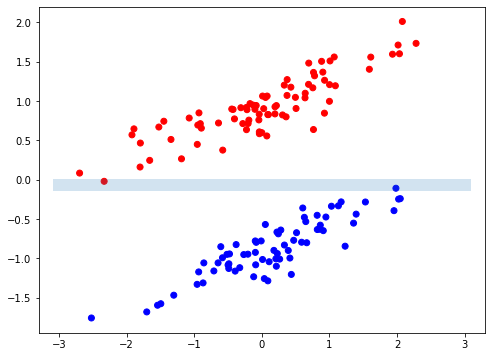

In [21]:
dictColor = { 0 : 'r', 1 : 'b'}
plt.figure(figsize = [8, 6])
mycolor = [ dictColor[x] for x in y_train]
plt.scatter(X_train[:, 0], X_train[:, 1], c = mycolor)
plt.plot([-3, 3], [-0.065, -0.065], linewidth = 12, alpha = 0.2)

### 10.1.1 Training with one noise

[[-0.20175817  0.71478438]
 [-2.69360573  0.08343505]
 [-0.48596464 -1.07043945]
 [-1.88985408  0.64613149]
 [ 1.5         1.        ]]
[0 0 1 0 1]


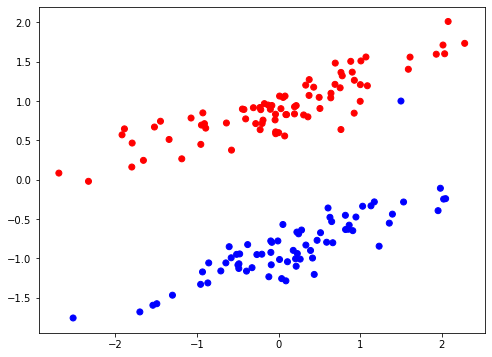

In [22]:
newX = np.append(X_train, [[1.5, 1.0]], axis = 0)
newy = np.append(y_train, [1], axis = 0)
print(newX[-5:])
print(newy[-5:])

dictColor = { 0 : 'r', 1 : 'b'}
plt.figure(figsize = [8, 6])
mycolor = [ dictColor[x] for x in newy]
plt.scatter(newX[:, 0], newX[:, 1], c = mycolor)

1.0


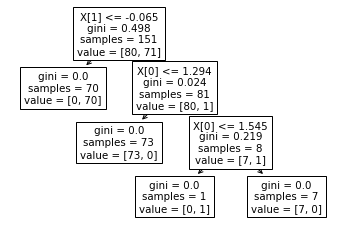

In [23]:
mymodel.fit(newX, newy)

from sklearn import tree
tree.plot_tree(mymodel)

pred = mymodel.predict(newX)
ans = pred - newy
error_cnt = abs(ans).sum()
accuracy_train = 1 - error_cnt / newy.shape[0]
print(accuracy_train)

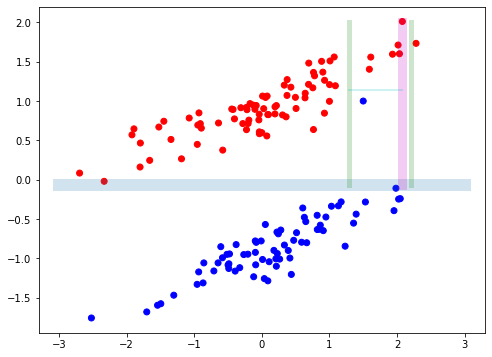

In [24]:
dictColor = { 0 : 'r', 1 : 'b'}
plt.figure(figsize = [8, 6])
mycolor = [ dictColor[x] for x in newy]
plt.scatter(newX[:, 0], newX[:, 1], c = mycolor)
plt.plot([-3, 3], [-0.065, -0.065], linewidth = 12, alpha = 0.2)
plt.plot([2.072, 2.072], [-0.065, 2], linewidth = 9, alpha = 0.2, c = 'm')
plt.plot([1.294, 1.294], [-0.065, 2], linewidth = 5, alpha = 0.2, c = 'g')
plt.plot([2.205, 2.205], [-0.065, 2], linewidth = 5, alpha = 0.2, c = 'g')
plt.plot([1.294, 2.072], [1.145, 1.145], linewidth = 2, alpha = 0.2, c = 'c')

## 10.2 Random Forest

In [25]:
Forest = RandomForestClassifier(max_depth = 4)

Forest.fit(X_train, y_train)

pred = Forest.predict(X_train)
ans = pred - y_train
error_cnt = abs(ans).sum()
accuracy_train = 1 - error_cnt / y_train.shape[0]

pred = Forest.predict(X_test)
ans = pred - y_test
error_cnt = abs(ans).sum()
accuracy_train = 1 - error_cnt / y_test.shape[0]
print(accuracy_train, accuracy_test)

0.96 0.96


### 10.2.1 Training with one noise

In [26]:
Forest = RandomForestClassifier(max_depth = 4)

Forest.fit(newX, newy)

pred = Forest.predict(newX)
ans = pred - newy
error_cnt = abs(ans).sum()
accuracy_train = 1 - error_cnt / newy.shape[0]

pred = Forest.predict(X_test)
ans = pred - y_test
error_cnt = abs(ans).sum()
accuracy_train = 1 - error_cnt / y_test.shape[0]
print(accuracy_train, accuracy_test)

0.96 0.96


### 10.2.2 Define some points and predict

In [27]:
p = Forest.predict([[1.7, 1.0], [2.5, 0.1], [2, -0.1]])
print(p)

[0 0 1]


In [28]:
print(len(Forest.estimators_))
for i in range(10):
    p = Forest.estimators_[i].predict([[1.7, 1.0], [2.5, 0.1], [2, -0.1]])
    print(p)

100
[1. 0. 1.]
[1. 0. 1.]
[0. 0. 1.]
[1. 1. 1.]
[0. 0. 1.]
[1. 1. 1.]
[1. 0. 1.]
[0. 0. 1.]
[0. 0. 1.]
[0. 1. 1.]


### 10.2.3 plot all tree in RF

In [29]:
# tree.plot_tree(Forest.estimators_[8])

100


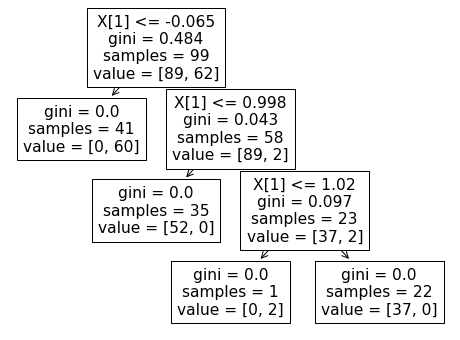

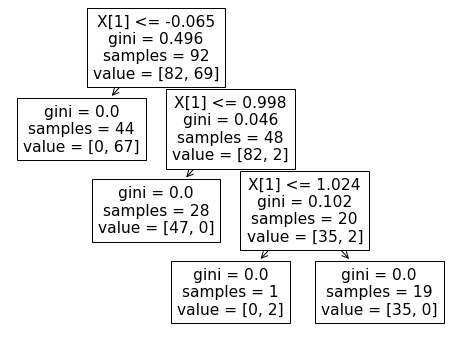

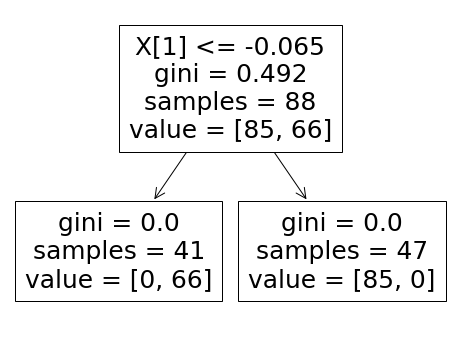

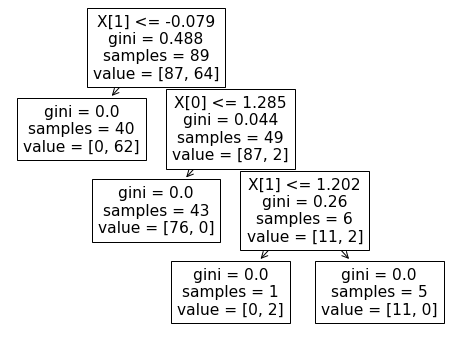

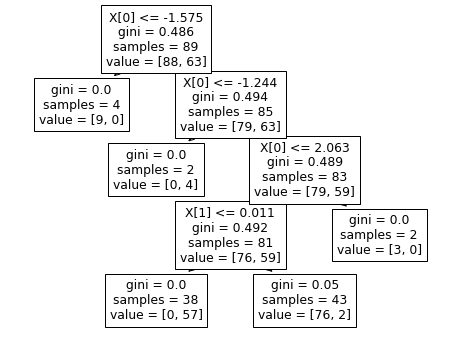

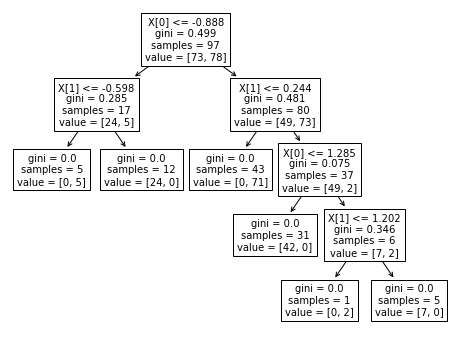

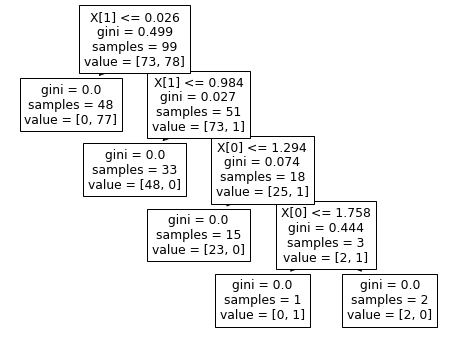

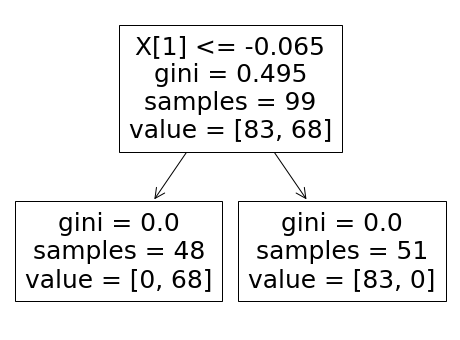

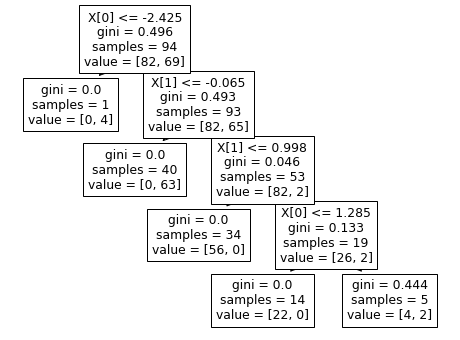

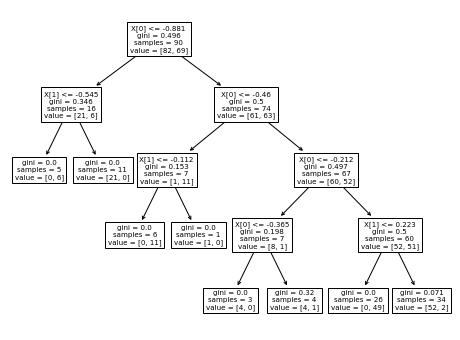

In [30]:
print(len(Forest.estimators_))
for i in range(10):
    plt.figure(figsize = [8, 6])
    tree.plot_tree(Forest.estimators_[i])

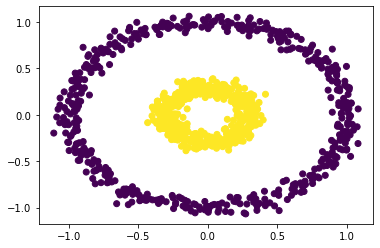

In [33]:
from sklearn.datasets import make_circles 
def Get_Circles_data(ShowGraph=1) :
    X, y = make_circles(n_samples=1000, random_state=2000, noise=0.05, factor=0.3) 
    if ShowGraph == 1 : plt.scatter(X[:,0], X[:, 1], c=y) 
        
    return X, y 
X, y = Get_Circles_data()